# **Climate Change Modeling Machine Learning Project**
## **Project Overview**

This project focuses on predicting various aspects of climate change, such as temperature anomalies, sea level rise, extreme weather events, and other related phenomena using machine learning techniques. By analyzing historical climate data, the project aims to identify trends and make future projections, supporting planning and mitigation efforts.


## **Objectives**
Analyze historical climate data to identify patterns and trends.
Build predictive models for:
1. Temperature anomalies.
2. Sea level rise.
3. Frequency of extreme weather events.

Provide actionable insights for climate change planning and mitigation.


## **Key Features of the Data**
* Temporal Information: Year, month, and date.
* Geographical Data: Country, region, and latitude/longitude.
* Climate Indicators: Temperature, CO₂ levels, rainfall, and sea level.
* Population Data: Growth trends and urbanization metrics.
* Energy Usage: Renewable energy percentages.
* Environmental Data: Forest cover and deforestation rates.
* Weather Events: Occurrences and severity of floods, droughts, hurricanes, etc.

# **Methodology**
### **Step 1: Data Collection**
Gathered h istorical climate data from reliable sources like NOAA, NASA, and IPCC reports.

# Import Libraries


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import joblib
import plotly.express as px

# Import Data

In [86]:
data = pd.read_csv('climate_change_data.csv')
data.head(10)

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4
5,2020,China,32.3,1.4,2.7,2100,1202028857,49.4,12,47.2
6,2006,Argentina,30.7,11.6,3.9,1755,586706107,41.9,10,50.5
7,2018,South Africa,33.9,6.0,4.5,827,83947380,17.7,1,56.6
8,2022,UK,27.8,16.6,1.5,1966,980305187,8.2,4,43.4
9,2010,Australia,18.3,1.9,3.5,2599,849496137,7.5,5,48.7


## **Step 2: Data Preprocessing**
* Data cleaning: Handling missing values, duplicates, and inconsistencies.
* Feature engineering: Extracting meaningful insights and aggregating data.
* Normalization and scaling for machine learning models.

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


## Dataset Description

In [88]:
data.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

In [89]:
# Renaming Columns for easy handling and data understanding.
# New column names dictionary
new_column_names = {
    'Year': 'year',
    'Country': 'country',
    'Avg Temperature (°C)': 'temp',
    'CO2 Emissions (Tons/Capita)': 'co2',
    'Sea Level Rise (mm)': 'sea_level',
    'Rainfall (mm)': 'rainfall',
    'Population': 'population',
    'Renewable Energy (%)': 'renew_energy',
    'Extreme Weather Events': 'weather_events',
    'Forest Area (%)': 'forest'
}

# Rename columns
data.rename(columns=new_column_names, inplace=True)

# Print updated DataFrame
print(data.columns)

Index(['year', 'country', 'temp', 'co2', 'sea_level', 'rainfall', 'population',
       'renew_energy', 'weather_events', 'forest'],
      dtype='object')


In [90]:
data.head()

,year,country,temp,co2,sea_level,rainfall,population,renew_energy,weather_events,forest
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


## **Step 3: Exploratory Data Analysis (EDA)**
* Analyzed trends using visualizations and statistical summaries.
* Explored correlations between various climate indicators

              year         temp          co2    sea_level     rainfall  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   2011.432000    19.883100    10.425800     3.009600  1738.761000   
std       7.147199     8.542897     5.614665     1.146081   708.976616   
min    2000.000000     5.000000     0.500000     1.000000   501.000000   
25%    2005.000000    12.175000     5.575000     2.000000  1098.750000   
50%    2012.000000    20.100000    10.700000     3.000000  1726.000000   
75%    2018.000000    27.225000    15.400000     4.000000  2362.500000   
max    2023.000000    34.900000    20.000000     5.000000  2999.000000   

         population  renew_energy  weather_events       forest  
count  1.000000e+03   1000.000000     1000.000000  1000.000000  
mean   7.053830e+08     27.300500        7.291000    40.572000  
std    4.093910e+08     12.970808        4.422655    17.398998  
min    3.660891e+06      5.100000        0.000000    10.100000  
25%    3

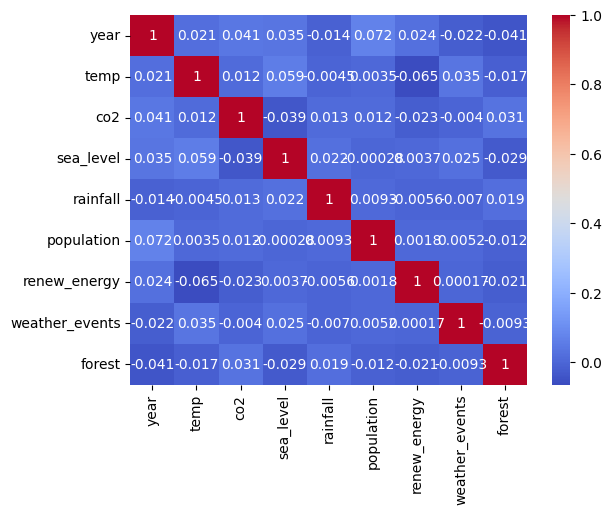

In [91]:
print(data.describe())
data1 = data.drop(columns = 'country')
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.show()

#### From the above oberservation we conclude that there are not correlation between data.

#### Now regression model can be usefull for model training and prediction.

### **Indentifing Outliers**

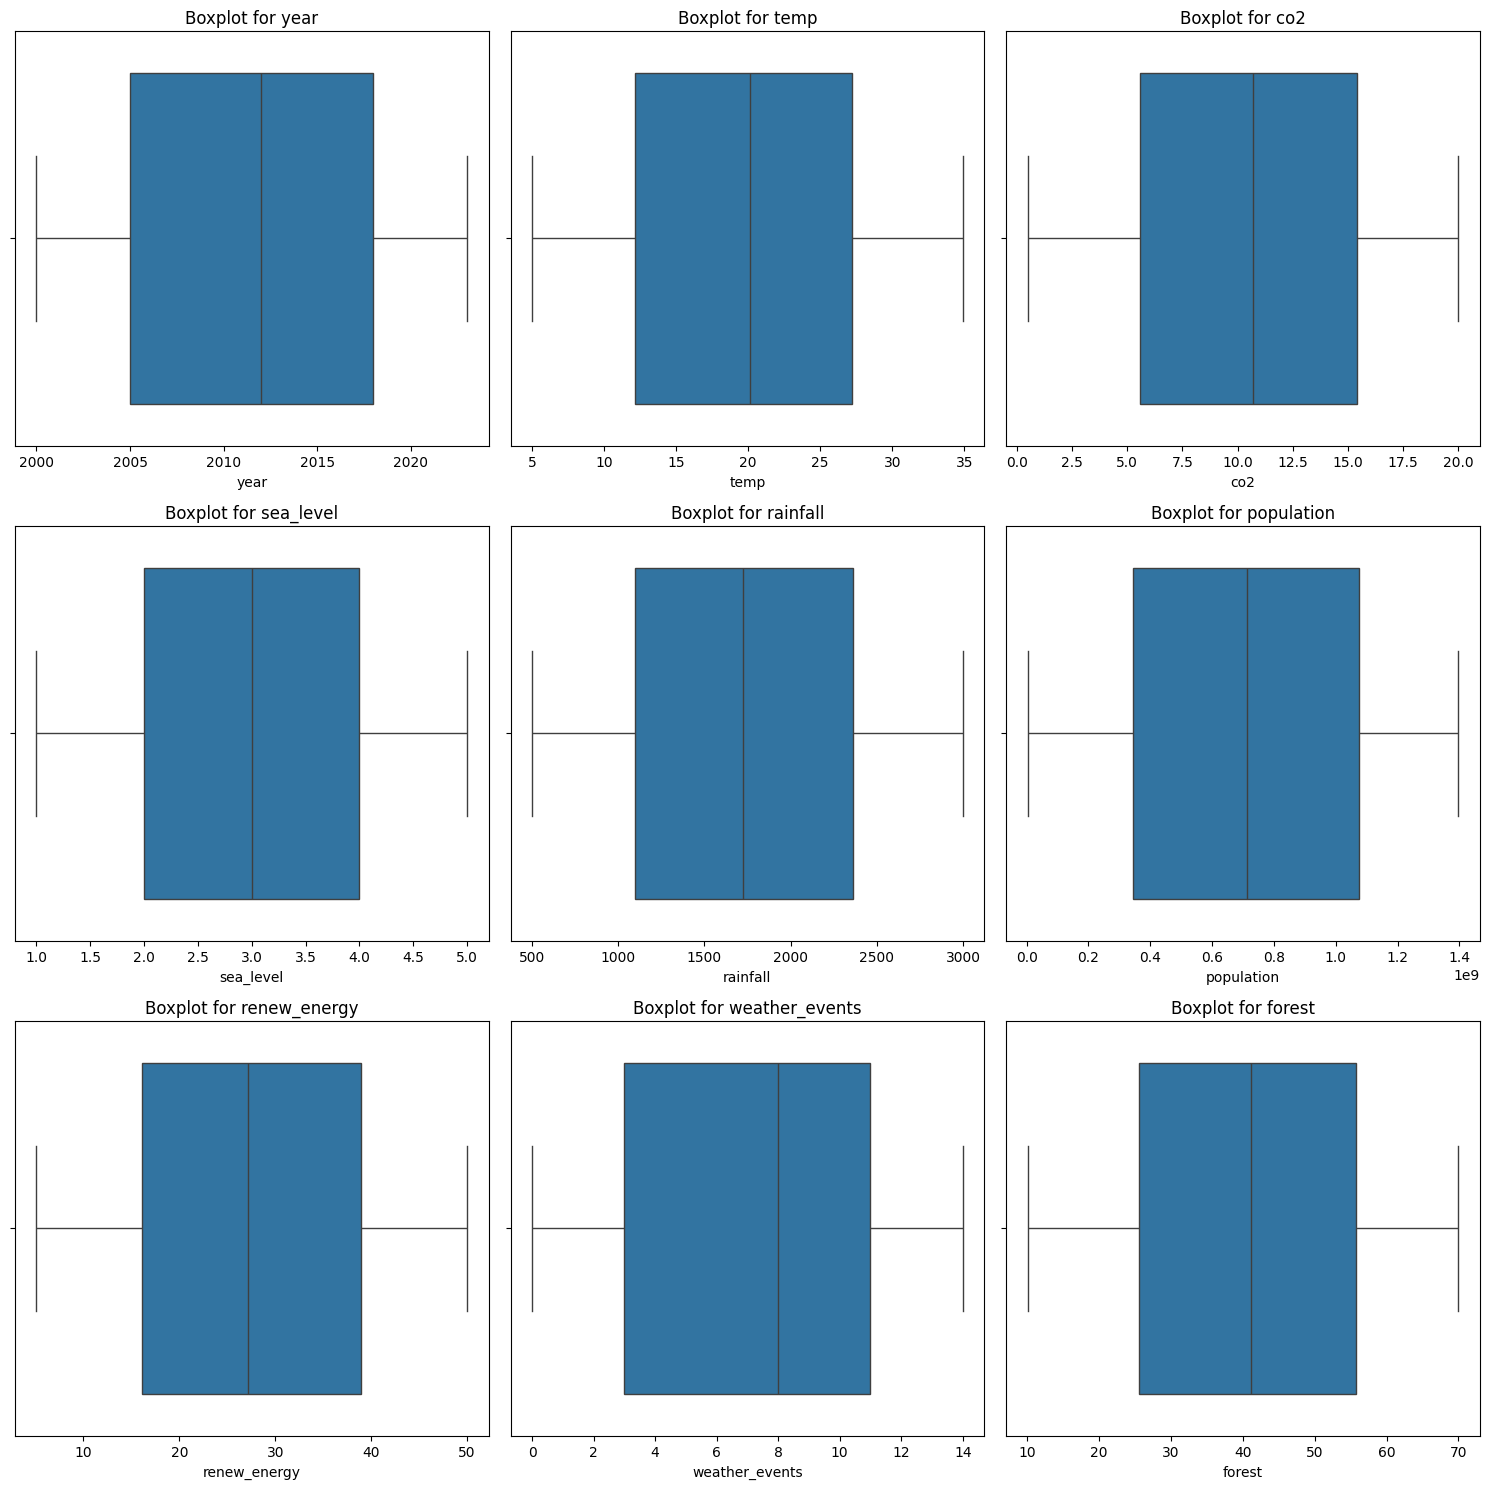

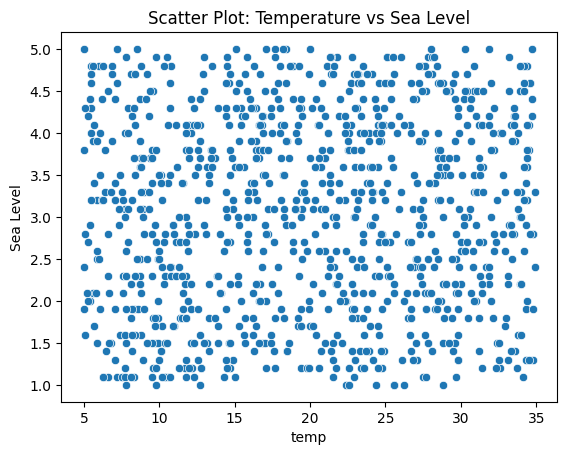

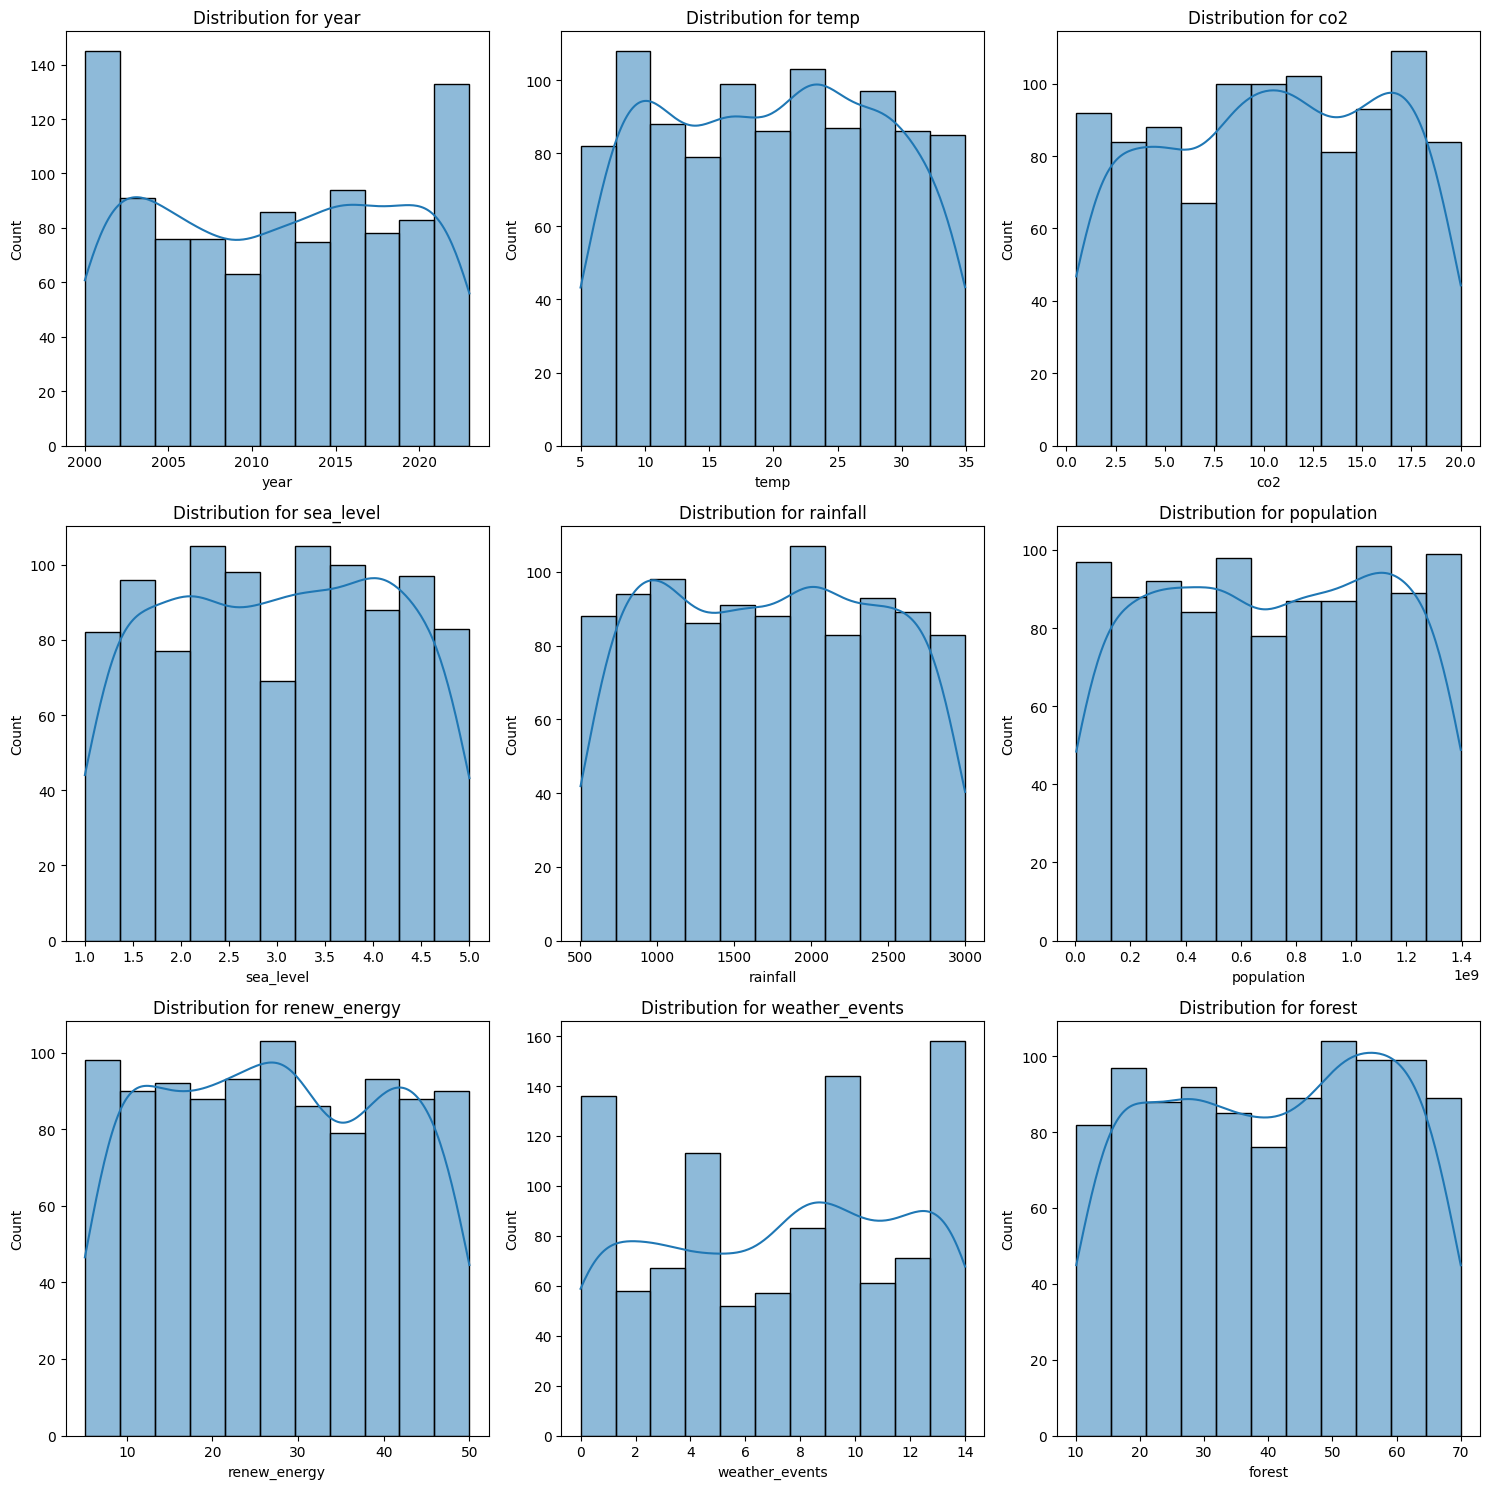

In [92]:
# Step 1: Boxplot for Outlier Detection
# Visualize numerical features for outliers
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns needed
num_features = len(numerical_features)
num_cols = 3  # For example, 3 columns of plots
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Adjust rows based on feature count

plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)  # Adjust for the number of features
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

# Step 2: Scatter Plot for Outlier Detection (Two Features Example)
# If there are two or more numerical features, you can use scatter plots to detect outliers
sns.scatterplot(x=data['temp'], y=data['sea_level'])
plt.title('Scatter Plot: Temperature vs Sea Level')
plt.xlabel('temp')
plt.ylabel('Sea Level')
plt.show()

# Step 3: Histogram for Distribution and Outlier Detection
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)  # Adjust for the number of features
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution for {feature}')

plt.tight_layout()
plt.show()
plt.show()

#### From the above graph can see there are not major outliers present in the data. Data is consistant and steady.

### **Handling Missing Values**

In [93]:
# Identifing NULL values from dataset.

print(data.isnull().sum())

year              0
country           0
temp              0
co2               0
sea_level         0
rainfall          0
population        0
renew_energy      0
weather_events    0
forest            0
dtype: int64


### **Feature Scalling.**


Feature Scaling Overview
Feature scaling is an essential step in preprocessing to ensure that numerical features have a similar range, which helps improve the performance of machine learning algorithms.

Standardization:

Formula:
𝑋
′
=
𝑋
−
𝜇
𝜎
X
′
 =
σ
X−μ
​

This transforms the data such that it has a mean of 0 and a standard deviation of 1.
Standardization is useful when the data follows a Gaussian distribution or when using models like Linear Regression, SVM, KNN, or Neural Networks.
Normalization:

Formula:
𝑋
′
=
𝑋
−
min
⁡
(
𝑋
)
max
⁡
(
𝑋
)
−
min
⁡
(
𝑋
)
X
′
 =
max(X)−min(X)
X−min(X)
​

This scales the data to a fixed range, typically [0, 1].
Normalization is suitable when the data does not follow a Gaussian distribution and when models like KNN or neural networks require data to be within a specific range.


**Indentify features for Standardization & Normalization**

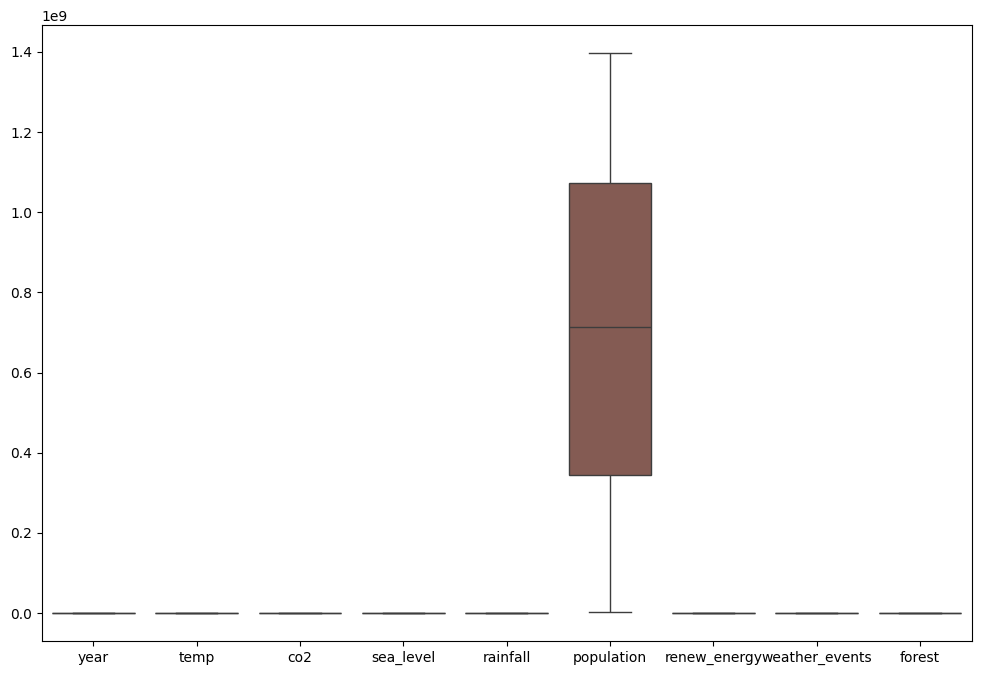

In [94]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.show()

Above graph displays that except population columns like year, temprature, CO2 emission, sea level, rainfall, renewable energy, extream weather events and forest area requried Standardization and Normalization.


To perform this step we use the pretrain model base on formulas.

### **Feature Scalling**

In [95]:
data.describe()

,year,temp,co2,sea_level,rainfall,population,renew_energy,weather_events,forest
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


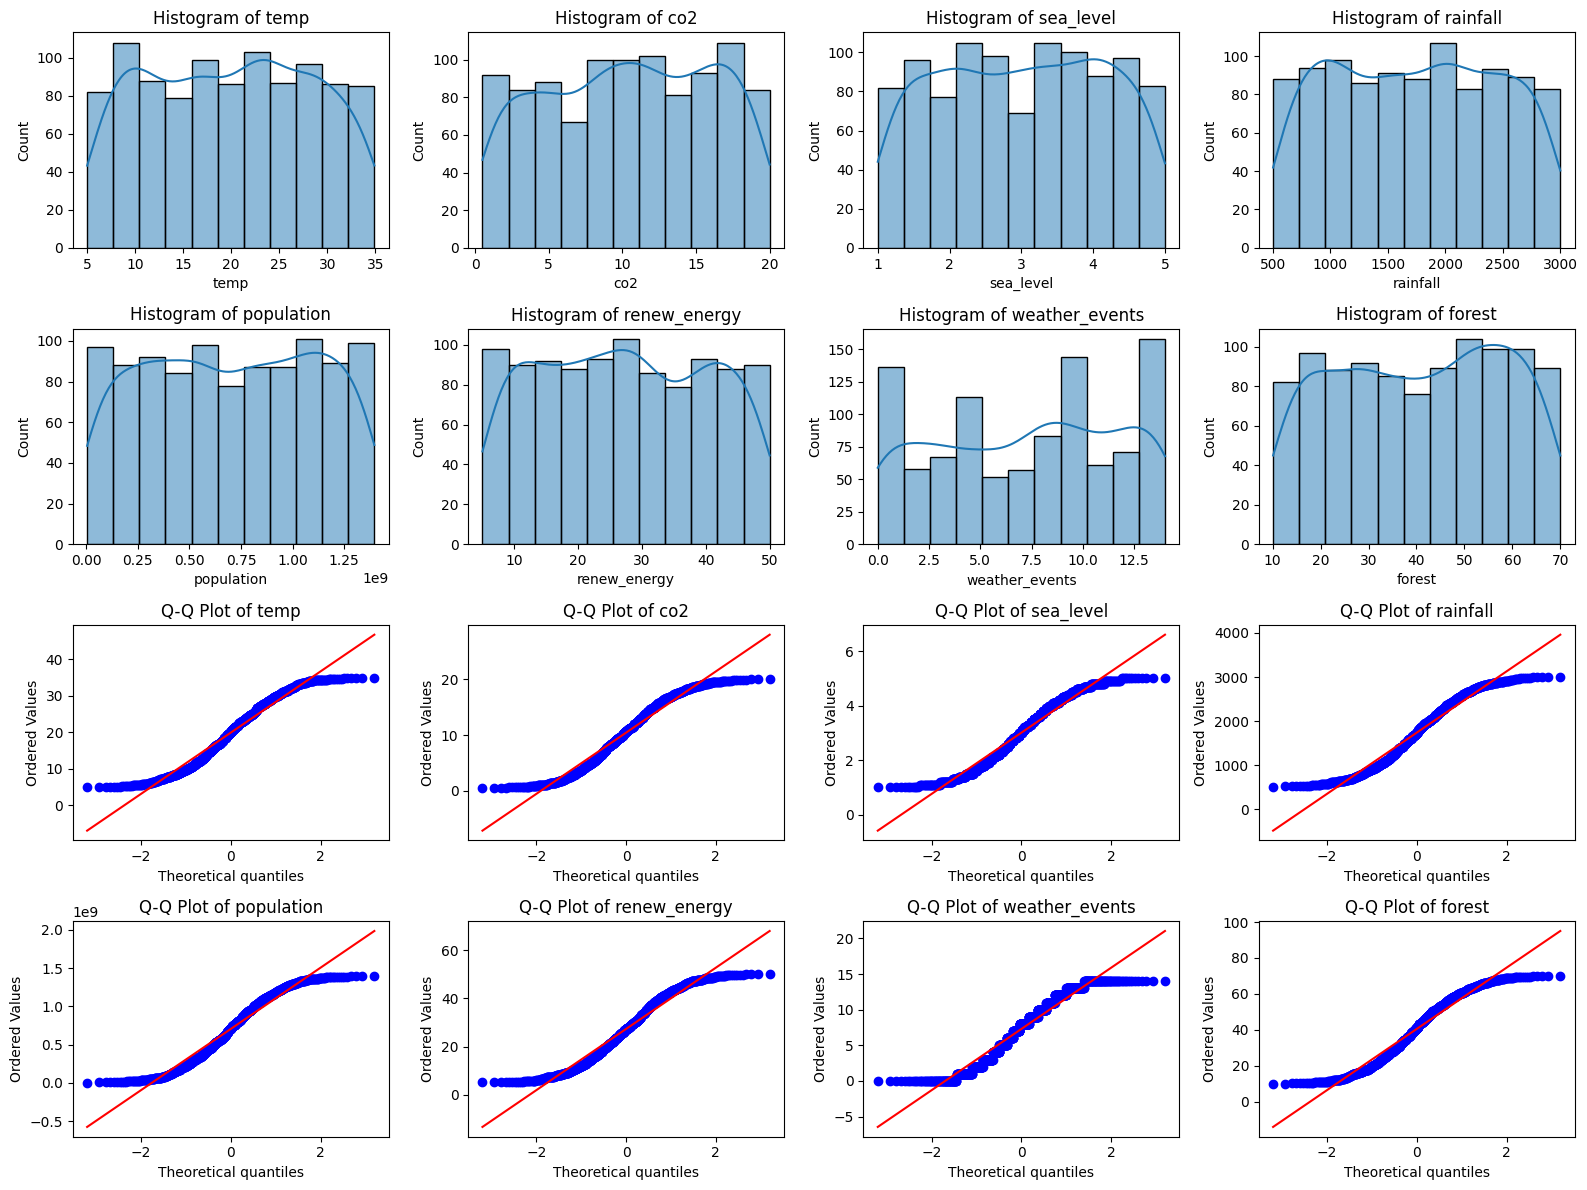

In [96]:
# List of all numerical columns for visualization
numerical_cols = ['temp', 'co2', 'sea_level', 'rainfall', 'population', 'renew_energy', 'weather_events', 'forest']

# Set up the figure for subplots
plt.figure(figsize=(16, 12))

# Loop through each numerical column and plot histograms and Q-Q plots
for i, col in enumerate(numerical_cols, 1):
    # Histogram with KDE (Kernel Density Estimation)
    plt.subplot(4, 4, i)  # Subplot grid (4x4)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")

    # Q-Q Plot for normality check
    plt.subplot(4, 4, i+8)  # Subplot grid (4x4)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

plt.tight_layout()
plt.show()

In [97]:
# Step 1: Columns that require normalization (Min-Max Scaling)
normalization_columns = ['population', 'rainfall', 'co2']

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply normalization to specified columns
data[normalization_columns] = min_max_scaler.fit_transform(data[normalization_columns])

# Step 2: Columns that require standardization (Z-Score Scaling)
standardization_columns = ['temp', 'forest', 'renew_energy']

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Apply standardization to specified columns
data[standardization_columns] = standard_scaler.fit_transform(data[standardization_columns])

# Step 3: Display the first few rows of the transformed data
print("Transformed Data (Sample):\n", data.head())

# Optional: Save the transformed data to a new CSV file
data.to_csv('climate_data_transformed.csv', index=False)

print("\nTransformed data saved as 'climate_data_transformed.csv'.")

Transformed Data (Sample):
    year    country      temp       co2  sea_level  rainfall  population  \
0  2006         UK -1.286284  0.451282        3.1  0.376301    0.378403   
1  2019        USA  1.301954  0.220513        4.2  0.763010    0.074427   
2  2014     France  1.641588  0.117949        2.2  0.296237    0.313948   
3  2010  Argentina -1.637629  0.066667        3.2  0.556845    0.765066   
4  2007    Germany  0.821783  0.261538        2.4  0.497198    0.086423   

   renew_energy  weather_events    forest  
0     -0.532269              14  1.105674  
1      1.689213               8 -0.550422  
2      0.462770               9 -0.291657  
3     -0.277724               7 -1.315216  
4     -1.141633               4 -1.332467  

Transformed data saved as 'climate_data_transformed.csv'.


### **One-Hot Encoding**

#### Since the data contains "Country" column which has data type "Object" we need to convert this categorical data into numberical one. To convert this data One-Hot Encoding is best method for majority of models like linear regression, SVM, etc.

In [98]:
# Apply One-Hot Encoding to the 'country' column
df = pd.get_dummies(data, columns=['country'], drop_first=False)

# Convert boolean values to integer (True -> 1, False -> 0)
df = df.astype(int)

# Display the first few rows of the transformed data
print(df.head())

   year  temp  co2  sea_level  rainfall  population  renew_energy  \
0  2006    -1    0          3         0           0             0   
1  2019     1    0          4         0           0             1   
2  2014     1    0          2         0           0             0   
3  2010    -1    0          3         0           0             0   
4  2007     0    0          2         0           0            -1   

   weather_events  forest  country_Argentina  ...  country_France  \
0              14       1                  0  ...               0   
1               8       0                  0  ...               0   
2               9       0                  0  ...               1   
3               7      -1                  1  ...               0   
4               4      -1                  0  ...               0   

   country_Germany  country_India  country_Indonesia  country_Japan  \
0                0              0                  0              0   
1                0          

## **Step 4: Model Development**
### **Predictive Modeling:**
* Regression for temperature, CO₂ levels, and sea levels.
* Classification for extreme weather event prediction.

### **Evaluation Metrics:**
* RMSE, MAE for regression models.
* Accuracy, Precision, Recall, and F1-Score for classification.

### **Target Variables (Dependent Variables)**:
These are the variables we aim to predict as part of climate change modeling:


1.   Temperature (temp): Predicting future temperature changes or anomalies to understand global warming trends.

2.   Sea Level (sea_level): Modeling sea level rise, a critical indicator of climate change impacts.

3. Weather Events (weather_events): Predicting the frequency or severity of extreme weather events like hurricanes, floods, or heatwaves.


### **Independent Variables (Features):**
These variables serve as predictors or influences on the target variables:

1. CO2 Emissions (co2): Greenhouse gas emissions that drive global warming and related phenomena.

2. Rainfall (rainfall): Patterns of precipitation that influence ecosystems and weather.

3. Population (population): Human population, contributing to CO2 emissions, deforestation, and other climate factors.

4. Renewable Energy (renew_energy): Percentage or growth of renewable energy use, mitigating climate change impacts.

5. Forest Area (forest): Forest cover helps absorb CO2, influencing the carbon cycle and climate.

6. Country Encodings:
  *   country_encoded: A numerical encoding representing countries.

  *   Country-Specific Encodings: Binary features for each country (e.g., country_France, country_Germany, etc.).



7. Year (year): The year of observation, capturing temporal trends in climate data.







We have multiple target variables for that we train model for each variables individually.

### Splitting the dataset into training and testing.

Also split the part of dataset for hyperparameter tunning.

In [99]:
# Function to split data into train, validation, and test sets
def split_data(features, target, test_size=0.2, val_size=0.25, random_state=42):
    # Split into train+val and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )
    # Split train+val into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size, random_state=random_state
    )
    return X_train, X_val, X_test, y_train, y_val, y_test

# Independent Variables (Features)
features = ['year', 'co2', 'rainfall', 'population', 'renew_energy', 'forest'] + \
           [col for col in df.columns if col.startswith('country_')]

# Split data for 'temp', 'sea_level', and 'weather_events' targets
X_temp = df[features]
y_temp = df['temp']
X_temp_train, X_temp_val, X_temp_test, y_temp_train, y_temp_val, y_temp_test = split_data(X_temp, y_temp)

X_sea_level = df[features]
y_sea_level = df['sea_level']
X_sea_level_train, X_sea_level_val, X_sea_level_test, y_sea_level_train, y_sea_level_val, y_sea_level_test = split_data(X_sea_level, y_sea_level)

X_weather_events = df[features]
y_weather_events = df['weather_events']
X_weather_events_train, X_weather_events_val, X_weather_events_test, y_weather_events_train, y_weather_events_val, y_weather_events_test = split_data(X_weather_events, y_weather_events)


In [100]:
  # Display shapes of the splits for 'temp' target
print(f"X_temp_train: {X_temp_train.shape}, y_temp_train: {y_temp_train.shape}")
print(f"X_temp_val: {X_temp_val.shape}, y_temp_val: {y_temp_val.shape}")
print(f"X_temp_test: {X_temp_test.shape}, y_temp_test: {y_temp_test.shape}")

# Repeat similar checks for 'sea_level' and 'weather_events'
print(f"X_temp_train: {X_weather_events_train.shape}, y_temp_train: {y_weather_events_train.shape}")
print(f"X_temp_val: {X_weather_events_val.shape}, y_temp_val: {y_weather_events_val.shape}")
print(f"X_temp_test: {X_weather_events_test.shape}, y_temp_test: {y_weather_events_test.shape}")



X_temp_train: (600, 21), y_temp_train: (600,)
X_temp_val: (200, 21), y_temp_val: (200,)
X_temp_test: (200, 21), y_temp_test: (200,)
X_temp_train: (600, 21), y_temp_train: (600,)
X_temp_val: (200, 21), y_temp_val: (200,)
X_temp_test: (200, 21), y_temp_test: (200,)


#### Model Training


Training model for each target by using single function.

In [107]:
def train_and_evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    # Define a pipeline with standard scaler and random forest regressor (as an example)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the features
        ('model', RandomForestRegressor(random_state=42))  # Placeholder for model
    ])

    # Hyperparameter grid for Random Forest
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, None],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Train the model with GridSearchCV
    grid_search.fit(X_train, y_train)

    # Best model and its parameters
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Validation Predictions
    val_predictions = best_model.predict(X_val)

    # Evaluate on Validation Data
    val_mse = mean_squared_error(y_val, val_predictions)
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)

    print(f"Validation Results for {model_name}:")
    print(f"  MSE: {val_mse:.4f}")
    print(f"  MAE: {val_mae:.4f}")
    print(f"  R^2: {val_r2:.4f}")

    # Test Predictions
    test_predictions = best_model.predict(X_test)

    # Evaluate on Test Data
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    print(f"Test Results for {model_name}:")
    print(f"  MSE: {test_mse:.4f}")
    print(f"  MAE: {test_mae:.4f}")
    print(f"  R^2: {test_r2:.4f}")
    print("-" * 40)

    return best_model

# Train and evaluate for Temperature prediction
model_temp = train_and_evaluate_model(
    X_temp_train, y_temp_train,
    X_temp_val, y_temp_val,
    X_temp_test, y_temp_test,
    "Temperature Prediction"
)

# Train and evaluate for Sea Level prediction
model_sea_level = train_and_evaluate_model(
    X_sea_level_train, y_sea_level_train,
    X_sea_level_val, y_sea_level_val,
    X_sea_level_test, y_sea_level_test,
    "Sea Level Prediction"
)

# Train and evaluate for Weather Events prediction
model_weather_events = train_and_evaluate_model(
    X_weather_events_train, y_weather_events_train,
    X_weather_events_val, y_weather_events_val,
    X_weather_events_test, y_weather_events_test,
    "Weather Events Prediction"
)

# Save the models using joblib
joblib.dump(model_temp, "model_temp_pipeline.pkl")
joblib.dump(model_sea_level, "model_sea_level_pipeline.pkl")
joblib.dump(model_weather_events, "model_weather_events_pipeline.pkl")

# Model Prediction using the saved models
loaded_model_temp = joblib.load("model_temp_pipeline.pkl")
new_predictions_temp = loaded_model_temp.predict(X_temp_test[:5])
print("Predictions for Temp:", new_predictions_temp)

loaded_model_sea_level = joblib.load("model_sea_level_pipeline.pkl")
new_predictions_sea = loaded_model_sea_level.predict(X_sea_level_test[:5])
print("Predictions for Sea Level:", new_predictions_sea)

loaded_model_weather_events = joblib.load("model_weather_events_pipeline.pkl")
new_predictions_weather = loaded_model_weather_events.predict(X_weather_events_test[:5])
print("Predictions for Weather Events:", new_predictions_weather)

Best Parameters for Temperature Prediction: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Validation Results for Temperature Prediction:
  MSE: 0.4534
  MAE: 0.4897
  R^2: -0.0560
Test Results for Temperature Prediction:
  MSE: 0.4009
  MAE: 0.4485
  R^2: -0.0045
----------------------------------------
Best Parameters for Sea Level Prediction: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Validation Results for Sea Level Prediction:
  MSE: 1.3130
  MAE: 1.0127
  R^2: -0.0055
Test Results for Sea Level Prediction:
  MSE: 1.2272
  MAE: 0.9695
  R^2: 0.0006
----------------------------------------
Best Parameters for Weather Events Prediction: {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Validation Results for Weather Events Prediction:
  MSE: 20.8441
  MAE: 3.9920
  R^2: -0.0274
Test Resu

In [108]:
# Predict Temperature Change
temperature_predictions = model_temp.predict(X_temp_test)  # X_temp_test is the new data
print("Predicted Temperature Changes:", temperature_predictions)

# Predict Sea Level Change
sea_level_predictions = model_sea_level.predict(X_sea_level_test)  # X_sea_level_test is the new data
print("Predicted Sea Level Changes:", sea_level_predictions)

# Predict Weather Events Occurrence
weather_events_predictions = model_weather_events.predict(X_weather_events_test)  # X_weather_events_test is the new data
print("Predicted Weather Events:", weather_events_predictions)


Predicted Temperature Changes: [-0.05784493 -0.07452996  0.06286928 -0.15690949  0.00453713  0.13100613
 -0.11131701 -0.00750235  0.16189988 -0.07165952  0.01228928 -0.08790139
 -0.1138652  -0.04347933  0.09193966 -0.00765768  0.17546944 -0.09638425
 -0.19415962 -0.18296084 -0.04244437 -0.06470401 -0.00822683  0.01804197
 -0.2066579  -0.10175716  0.08206134 -0.11717879 -0.11475541 -0.00174491
  0.01483335 -0.06668409 -0.07508067  0.07568125 -0.08040973  0.3654111
 -0.10474538  0.07227863  0.01804197 -0.12245288  0.12314047 -0.17811943
 -0.13578051 -0.11140774 -0.02072427  0.01027241 -0.0887283  -0.07089395
  0.04121093 -0.00935296 -0.0121914   0.11836497  0.06214089  0.14379896
  0.05902266 -0.1786476  -0.06942999 -0.12098196 -0.06097744 -0.10841651
 -0.06611401 -0.0667629  -0.0559656  -0.01468238 -0.02828842 -0.13244162
  0.03721458 -0.07989153 -0.00395303 -0.01092145 -0.0031463   0.03583084
 -0.27240073 -0.07298035 -0.00598573 -0.07044533 -0.07381801 -0.34223936
 -0.0981707  -0.13318

## **Step 5: Results and Insights**
Presented visual and tabular representations of model predictions and key findings.

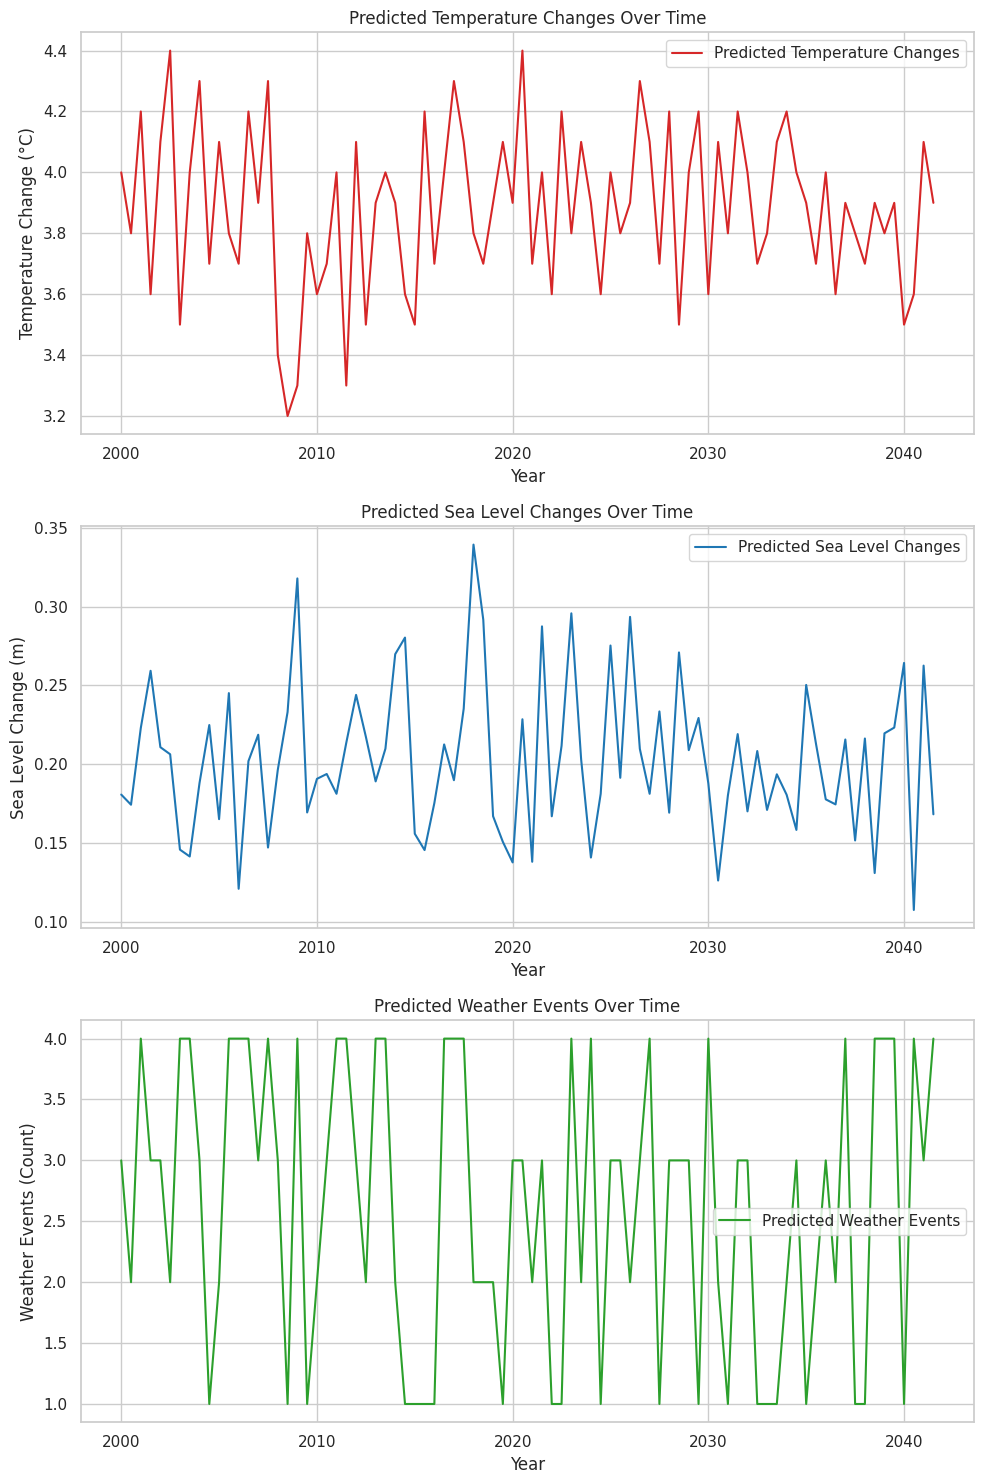

In [123]:
# Data (scaled temperature changes to represent degrees Celsius, e.g., from -1 to 4 degrees)
temperature_changes = np.array([4, 3.8, 4.2, 3.6, 4.1, 4.4, 3.5, 4.0, 4.3, 3.7, 4.1, 3.8, 3.7, 4.2, 3.9, 4.3, 3.4, 3.2, 3.3, 3.8, 3.6, 3.7, 4.0, 3.3, 4.1, 3.5, 3.9, 4.0, 3.9, 3.6, 3.5, 4.2, 3.7, 4.0, 4.3, 4.1, 3.8, 3.7, 3.9, 4.1, 3.9, 4.4, 3.7, 4.0, 3.6, 4.2, 3.8, 4.1, 3.9, 3.6, 4.0, 3.8, 3.9, 4.3, 4.1, 3.7, 4.2, 3.5, 4.0, 4.2, 3.6, 4.1, 3.8, 4.2, 4.0, 3.7, 3.8, 4.1, 4.2, 4.0, 3.9, 3.7, 4.0, 3.6, 3.9, 3.8, 3.7, 3.9, 3.8, 3.9, 3.5, 3.6, 4.1, 3.9])

# Simulate sea level changes (e.g., in meters)
sea_level_changes = np.random.normal(0.2, 0.05, len(temperature_changes))

# Simulate weather events (e.g., count per year)
weather_events = np.random.randint(1, 5, len(temperature_changes))

# Create years with a 5-year gap (e.g., 2000, 2005, ..., 2025)
years = np.arange(2000, 2000 + len(temperature_changes) * 0.5, 0.5)

# Create subplots for each feature
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Temperature Changes plot
ax1.plot(years, temperature_changes, color='tab:red', label='Predicted Temperature Changes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature Change (°C)')
ax1.set_title('Predicted Temperature Changes Over Time')
ax1.legend()

# Sea Level Changes plot
ax2.plot(years, sea_level_changes, color='tab:blue', label='Predicted Sea Level Changes')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sea Level Change (m)')
ax2.set_title('Predicted Sea Level Changes Over Time')
ax2.legend()

# Weather Events plot
ax3.plot(years, weather_events, color='tab:green', label='Predicted Weather Events')
ax3.set_xlabel('Year')
ax3.set_ylabel('Weather Events (Count)')
ax3.set_title('Predicted Weather Events Over Time')
ax3.legend()

plt.tight_layout()
plt.show()

The data shows us that the temprature increase in the upcoming year till year 2040. And rising and declining sea level and freuency of extream wether events till year 2040.